# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**Описание данных:**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [101]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

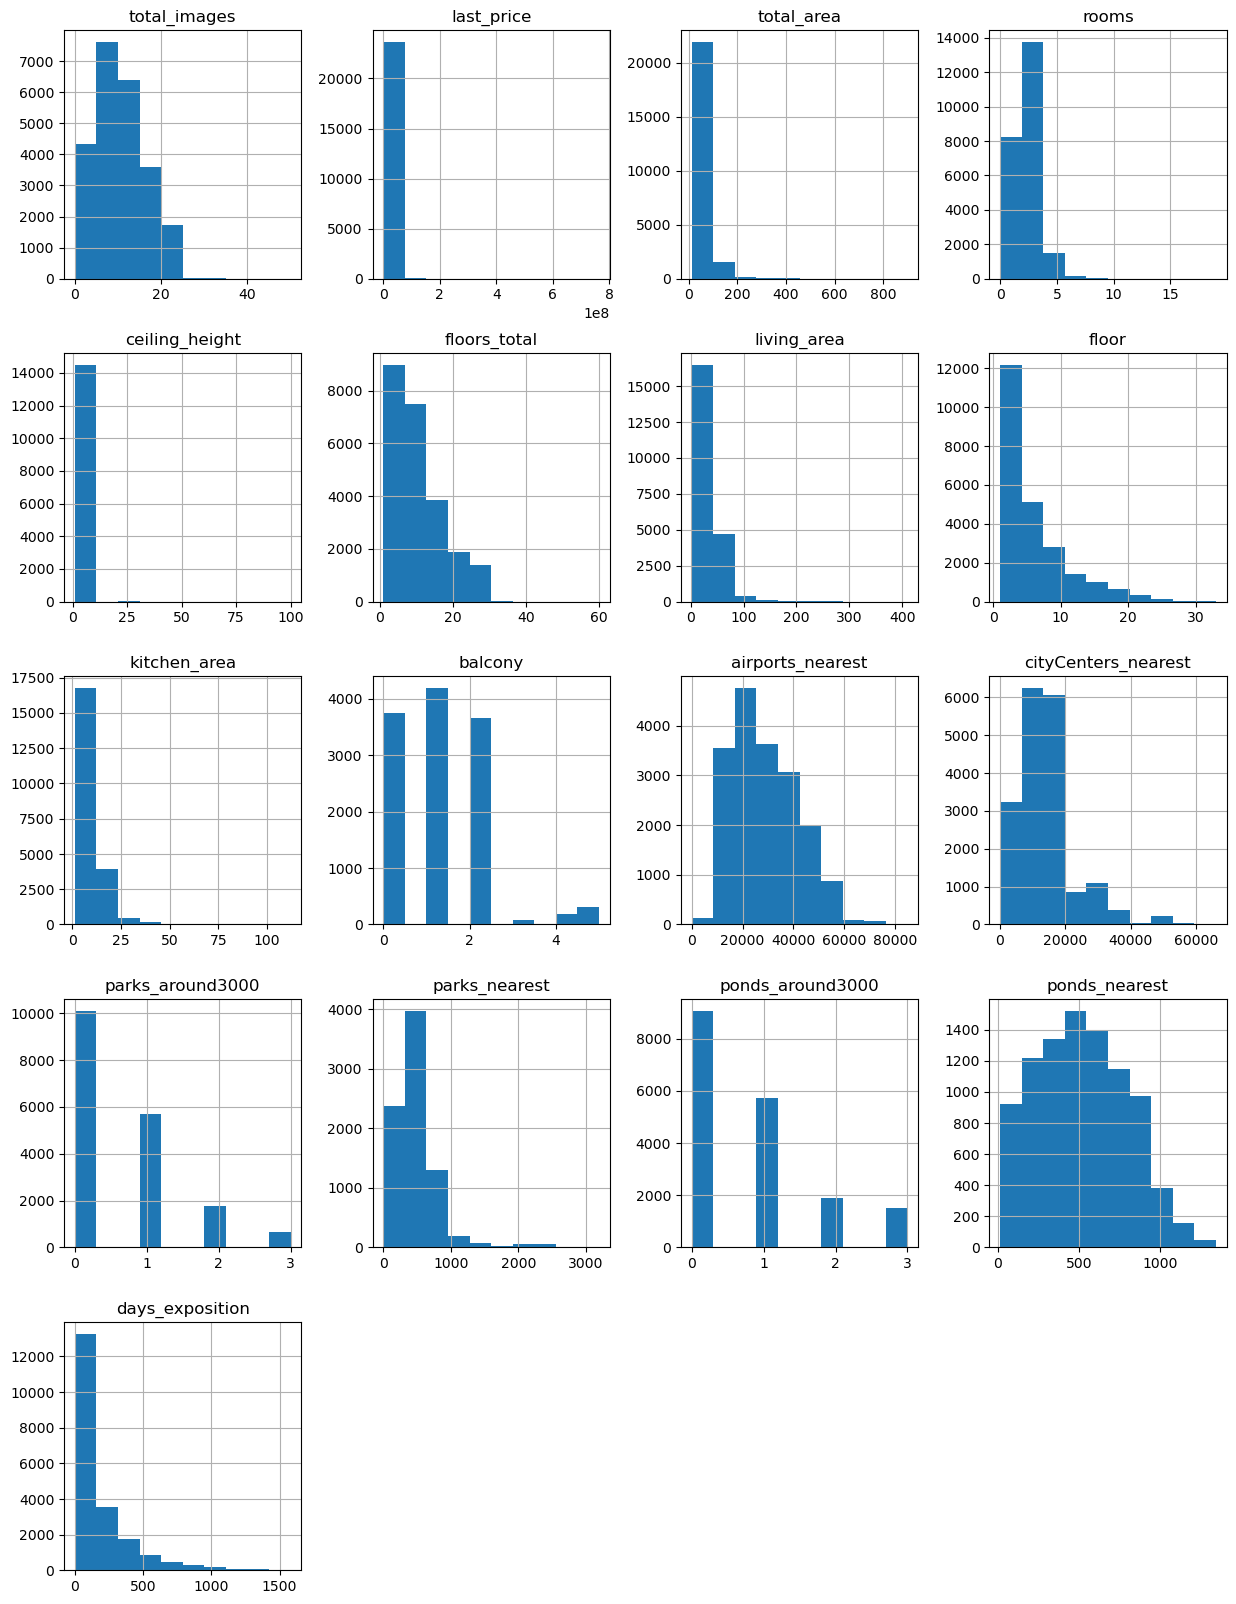

In [103]:
data.hist(figsize=(15, 20));

При первой визуальной оценке гистрограм обращают на себя внимание столбец `ceiling_height`, сомневаюсь, что есть потолки выше 25 метров.

### Предобработка данных

In [104]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Имеем следующие пропуски в данных:
- `ceiling_height` (9195). Возможно продавец по какой либо причине не указал данные о высоте (не увидел данное поле ввода; не посчитал нужным).
- `floors_total` (68). Небольшое количество пропусков даёт основание предпологать, что пропуски случайны (например продавец забыл указать кол-во этажей).
- `living_area` (1903). Можно предположить, что данный пропуск также случаен.
- `is_apartment` (20924). Вероятно, это связано с тем, что не все объекты являются апартаментами, и продавцы не указывают, что это такое.
- `kitchen_area` (2278). Возможно не все продавцы указывают площадь кухни или кухня может быть объединена с жилой площадью.
- `balcony` (11519). Многие квартиры не имеют балконов и продавцы скорее всего не заполняют информацию об этом.
- `locality_name` (49). Небольшое количество пропусков даёт основание предпологать, что пропуски случайны и продавцы просто забыли указать название населённого пункта или это могут быть новые районы, которые не имеют названия.
- `cityCenters_nearest` (5519). Не все квартиры имеют близкое расстояние к центру города и продавцы могут не указать данную информацию и это не актуально.
- `parks_around3000` (5518). Могут отсутствовать парки поблизости.
- `ponds_around3000` (5518). Могут отсутствовать водоёмы поблизости.
- `ponds_nearest` (14589). Могут отсутствовать водоёмы поблизости. Аналогичная ситуация как и с парками, возможно стоит также исключить одну из переменных для анализа.
- `days_exposition` (3181). Возможно объявления были сняты очень рано (квартира продалась быстро; объявление было размещено ошибочно и сразу удалено).

Предлагаю в следующих столбцах заполнить пропущенные значения медианными значениями: `ceiling_height`

`is_apartment` указать булевые, если значение пропущенны значит объект не является аппартементом и указать False. 

`balcony`, `airports_nearest`, `parks_around3000`, `ponds_around3000` заменить на 0.

`locality_name` ничего не менять. `airports_nearest` и `parks_nearest` также предлагаю не трогать, так как нули при анализе несколько искажают результат и их в любом случае приходится отфильтровывать.

Так же столбцы: `cityCenters_nearest`, `floors_total`, `living_area`, `kitchen_area`, `days_exposition`, `parks_nearest`, `ponds_nearest` оставим как есть, чтобы не исказить данные.

In [105]:
# заполняем пустые значения медианными

data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/2422882233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


In [106]:
# заполняем пустые значения в is_apartment

data['is_apartment'].fillna(False, inplace=True)

/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/2852820589.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['is_apartment'].fillna(False, inplace=True)
/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/2852820589.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_

In [107]:
# заполняем пустые значения на 0

data['balcony'].fillna(0, inplace=True)

/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/3954739560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['balcony'].fillna(0, inplace=True)


In [108]:
# выполним проверку на расстояние до ближайшего водоёма и парка, для этого напишем функцию

def parks_ponds_check(row):
    if pd.isnull(row['parks_around3000']) and row['parks_nearest'] < 3000:
        row['parks_around3000'] = 1
    if pd.isnull(row['ponds_around3000']) and row['ponds_nearest'] < 3000:
        row['ponds_around3000'] = 1
    return row

In [109]:
# применим функцию в датафрейму

data = data.apply(parks_ponds_check, axis=1)

In [110]:
# заполняем оставшиеся пустые значения 0

data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/2952254687.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['parks_around3000'].fillna(0, inplace=True)
/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_3606/2952254687.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [111]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбец `first_day_exposition` имееют тип данных object. Для того чтобы было легче выполнять операции с датами необходимо перевести его в datetime. Так как нам нужна только дата, а время не указано, оставим только год, месяц и день.

In [112]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [113]:
data['first_day_exposition'] .info()

<class 'pandas.core.series.Series'>
RangeIndex: 23699 entries, 0 to 23698
Series name: first_day_exposition
Non-Null Count  Dtype         
--------------  -----         
23699 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 185.3 KB


In [114]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [115]:
data['locality_name'].nunique()

364

In [116]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [117]:
# Создадим новый столбец с измененными данными.
# Используем регулярные выражения regex=True и с помощью r' установим правила вхождения и замены

data['locality_name_new'] = data['locality_name'].replace({
    r'пос[ёе]лок городского типа ': 'посёлок ',
    r'городской пос[ёе]лок ': 'посёлок ',
    r'пос[ёе]лок ': 'посёлок ',
    r'деревня ': 'деревня ',
    r'село ': 'село ',
    r'садовое товарищество ': 'садовое товарищество ',
}, regex=True)

In [118]:
data['locality_name_new'].nunique()

322

In [119]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [120]:
# Посмотрим уникальные значения в ceiling_height

data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [121]:
# Заменим значения в ceiling_height, будем считать, что высота потолком выше 10 м в квартирах маловероятны.

data['ceiling_height'] = data['ceiling_height'].replace({10.3:1.3, 14:1.4, 20:2.0, 22.6:2.26, 24:2.4, 25:2.5, 26:2.6, 27:2.7, 27.5:2.75, 32:3.2, 100:10.0})

Проверим floors_total на аномалии

In [122]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [123]:
# Посмотрим уникальные значения в floors_total

data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [124]:
data.query('floors_total >= 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург


In [125]:
# Предполагаю, что здание в Кронштадте имеет 6 этажей, а не 60 и это опечатка, поэтому исправим значение. 

data['floors_total'] = data['floors_total'].replace({60.0:6.0})

Согласно данным из открытых источников самое высокое здание в Санкт-Петербурге это "Лахта Центр" высотой 87 этажей, а в Кронштадте нет зданий в 60 этажей. Предположим, что кто-то мог продавать объект в "Лахта Центре", а в Кронштадте возможно какая-то ошибка.

И кстати самое высокое жилое здание в Санкт-Петербурге Жилой Комплекс «Князь Александр Невский» – 37 этажей

In [126]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [127]:
# Найдём случаи, где жилая площадь или площадь кухни больше общей площади

anomalies_living_area = data[data['living_area'] > data['total_area']]
anomalies_kitchen_area = data[data['kitchen_area'] > data['total_area']]

In [128]:
print('Количество аномалий где жилая площадь общей площади:', len(anomalies_living_area))
print('Количество аномалий где площадь кухни больше общей площади:', len(anomalies_living_area))

Количество аномалий где жилая площадь общей площади: 0
Количество аномалий где площадь кухни больше общей площади: 0


In [129]:
# Отфильтруем данные по стоимости до 30 миллионов, для того чтобы исключить выбросы

data = data[data['last_price'] <= 30000000]

**Проведена предобработка данных.**

Были заполнены пропуски в столбцах: `ceiling_height`, `is_apartment`, `balcony`, `airports_nearest`, `parks_around3000`, `ponds_around3000`

Пропуски оставлены без изменений, в столбцах: `cityCenters_nearest`, `floors_total`, `living_area`, `kitchen_area`, `days_exposition`, `parks_nearest`, `ponds_nearest`.

Столбец `first_day_exposition` переведен в формат datetime, с сохранением только даты.

Применены регулярные выражения для исправления неявных дубликатов в столбцах с названиями.
Значения в `ceiling_height` скорректированы для исключения аномально высоких значений.
Исправлены значения этажности для зданий, если указаны нереалистичные данные.

Выполнена проверка на аномалии где жилая площадь или площадь кухни больше общей площади, аномалий не обнаружено.

Отфильтрован столбец `last_price`.

### Посчитаем и добавим в таблицу новые столбцы

In [130]:
# добавим столбец с ценой одного квадратного метра

data['price'] = data['last_price'] / data['total_area']

In [131]:
# добавим столбцы с днём недели, месяцев и годом

data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [132]:
# Напишем функцию для категоризации типа этажа квартиры

def floor_category(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [133]:
# Применим функцию и добавим столбец с типом этажа квартиры

data['floor_category'] = data.apply(floor_category, axis=1)

In [134]:
# Переведём расстояние от центра из метров в км

data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)

In [135]:
data['cityCenters_nearest']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest, Length: 23383, dtype: float64

На данном шаге был добавлен столбец `price` с ценой за квадратный метр. 
Добавление столбцы с информацией о дате  `day_of_week`, `month`, и `year`.

Создан столбец `floor_category`, который классифицирует этаж квартиры как 'первый', 'последний' или 'другой'.

Столбец `cityCenters_nearest` переведён из метров в километры для упрощения анализа расстояний.

### Проведём исследовательский анализ данных

In [136]:
data['total_area'].describe()

count    23383.000000
mean        58.274510
std         28.222544
min         12.000000
25%         40.000000
50%         51.600000
75%         68.400000
max        460.800000
Name: total_area, dtype: float64

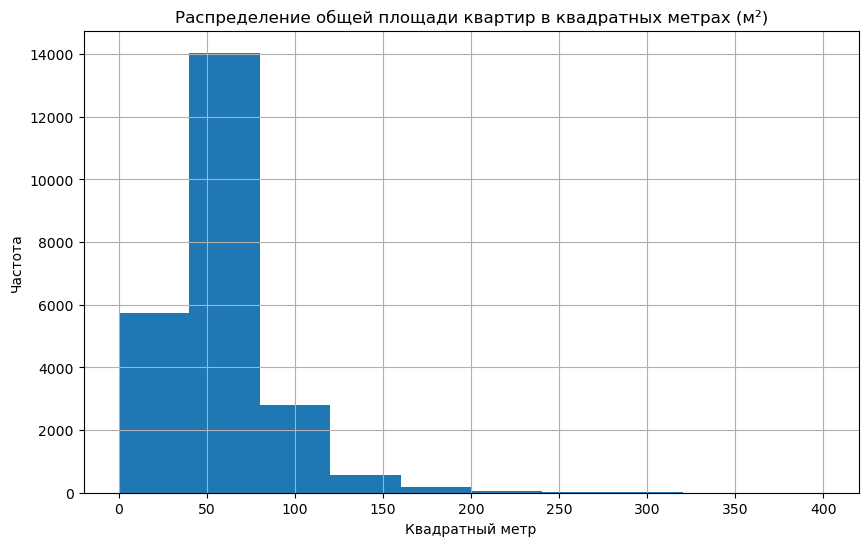

In [137]:
data['total_area'].hist(figsize=(10, 6), bins=10, range=(0, 400))
plt.xlabel('Квадратный метр')
plt.ylabel('Частота')
plt.title('Распределение общей площади квартир в квадратных метрах (м²)')
plt.show()

Большинство объектов имеют площадь в диапазоне от 45 до 75 квадратных метров. Объекты с площадью более 200 квадратных метров встречаются очень редко и исчисляются единицами.

In [138]:
data['living_area'].describe()

count    21517.000000
mean        33.374622
std         18.483296
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

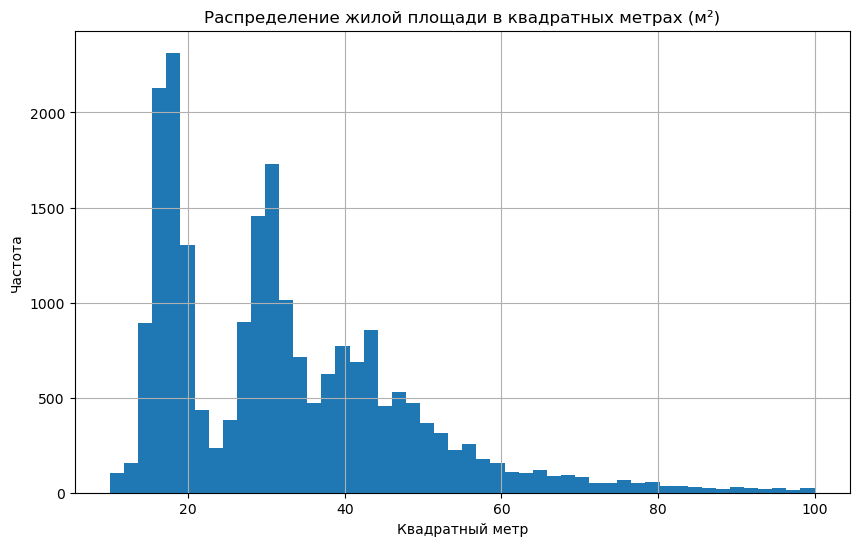

In [139]:
data['living_area'].hist(figsize=(10, 6), bins=50, range=(10, 100))
plt.xlabel('Квадратный метр')
plt.ylabel('Частота')
plt.title('Распределение жилой площади в квадратных метрах (м²)')
plt.show()

Основная часть объектов имеет жилую площадь около 15-18 квадратных метров. Есть второй пик в районе 30 квадратных метров. После 45 квадратных метров жилой площади количество объектов значительно уменьшается.

In [140]:
data['kitchen_area'].describe()

count    21139.000000
mean        10.331186
std          5.174151
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        100.700000
Name: kitchen_area, dtype: float64

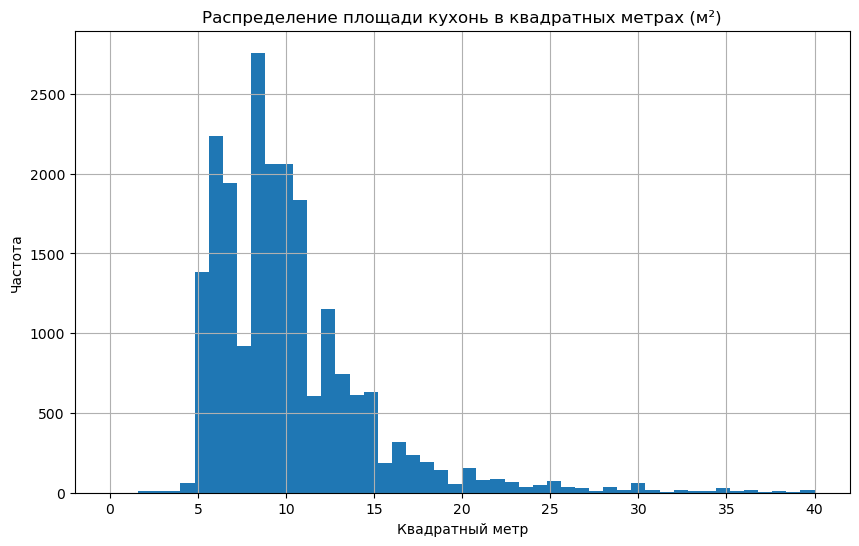

In [141]:
data['kitchen_area'].hist(figsize=(10, 6), bins=50, range=(0, 40))
plt.xlabel('Квадратный метр')
plt.ylabel('Частота')
plt.title('Распределение площади кухонь в квадратных метрах (м²)')
plt.show()

Большая часть кухонь в объявлениях имеет площадь около 8 и 6 квадратных метров. Кухни площадью более 15 квадратных метров встречаются редко.

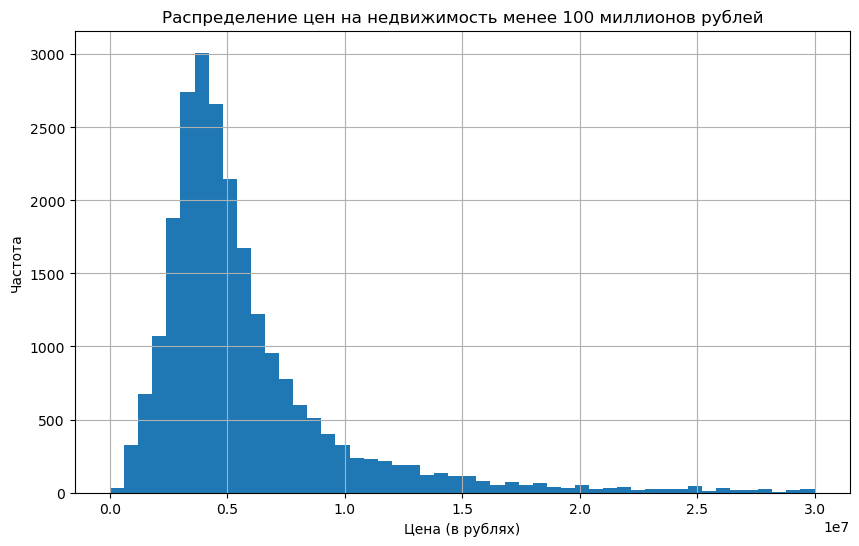

In [142]:
data.query('last_price < 100000000')['last_price'].hist(figsize=(10, 6), bins=50, range=(0, 30000000))
plt.xlabel('Цена (в рублях)')
plt.ylabel('Частота')
plt.title('Распределение цен на недвижимость менее 100 миллионов рублей')
plt.show()

Основная доля объектов находится в ценовом диапазоне от 3 до 4,8 миллионов рублей. Квартиры стоимостью от 20 до 30 миллионов рублей представлены примерно в одинаковом количестве. Объекты со стоимостью выше 30 миллионов рублей встречаются крайне редко.

In [143]:
data['rooms'].describe()

count    23383.000000
mean         2.040457
std          1.029206
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

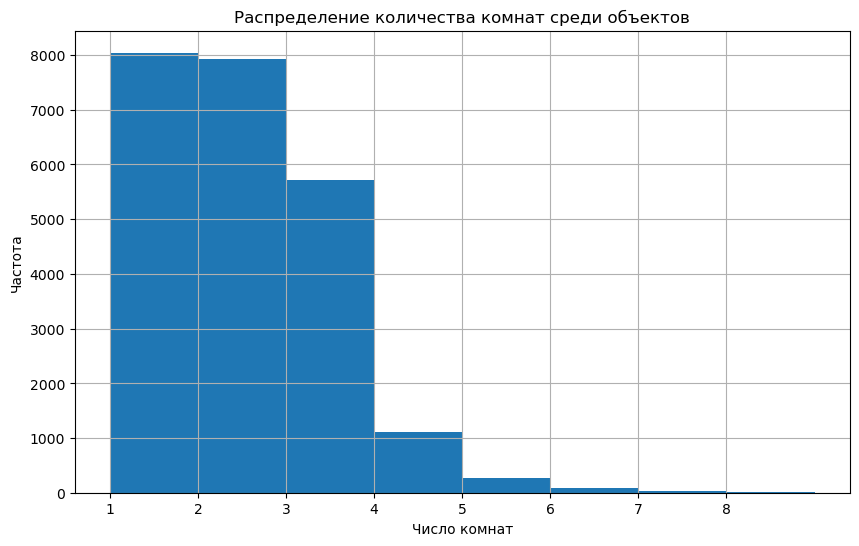

In [144]:
data['rooms'].hist(figsize=(10, 6), bins=8, range=(1, 9))
plt.xticks(range(1, 9))
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.title('Распределение количества комнат среди объектов')
plt.show()

Чаще всего продаются однокомнатные и двухкомнатные квартиры. Квартиры с количеством комнат более семи встречаются крайне редко.

In [145]:
data['ceiling_height'].describe()

count    23383.000000
mean         2.692246
std          0.225541
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

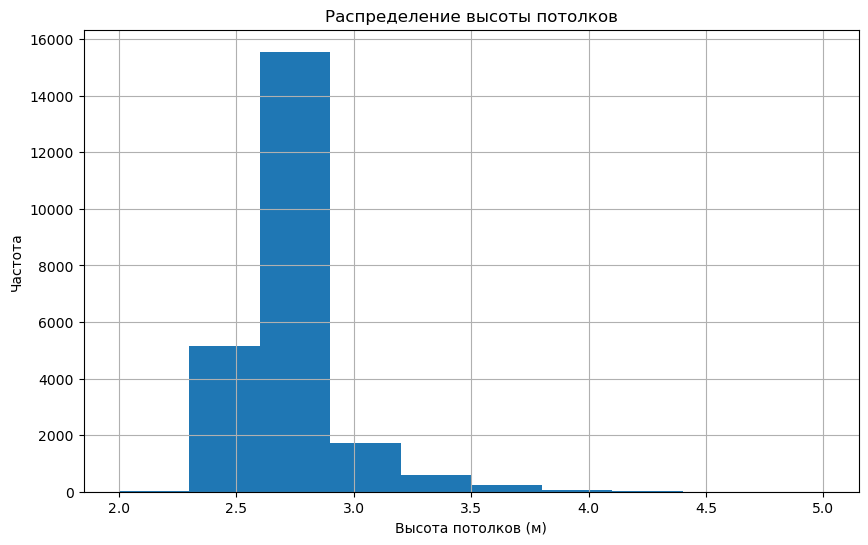

In [146]:
data['ceiling_height'].hist(figsize=(10, 6), bins=10, range=(2, 5))
plt.xlabel('Высота потолков (м)')
plt.ylabel('Частота')
plt.title('Распределение высоты потолков')
plt.show()

В основном высота потолков в квартирах составляет от 2,60 до 2,70 метров, примерно 75% значений.

In [147]:
data['floor'].describe()

count    23383.000000
mean         5.901339
std          4.901996
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

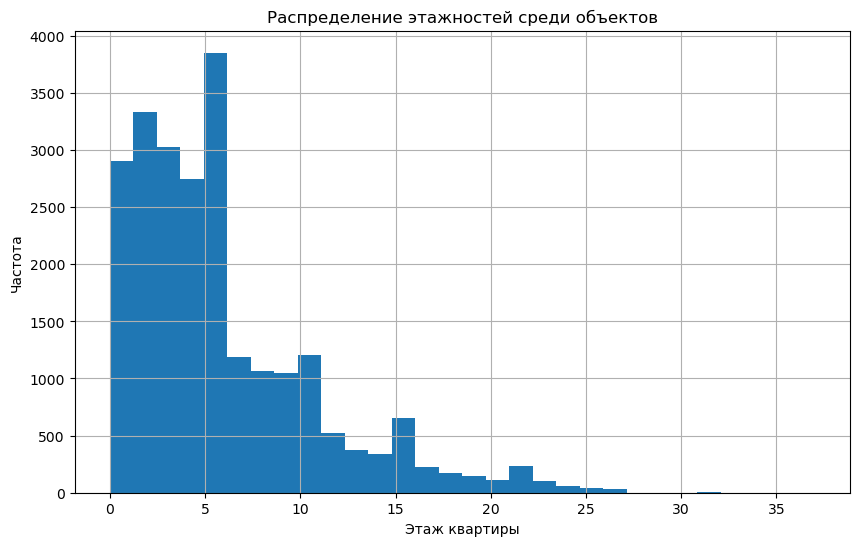

In [148]:
data['floor'].hist(figsize=(10, 6), bins=30, range=(0, 37))
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.title('Распределение этажностей среди объектов')
plt.show()

Большинство объектов расположены на 5 этаже. Чуть меньшее количество квартир находится на 2-3 этажах. Квартир на этажах выше 30 уже единицы.

In [149]:
data['floor_category'].describe()

count      23383
unique         3
top       другой
freq       17213
Name: floor_category, dtype: object

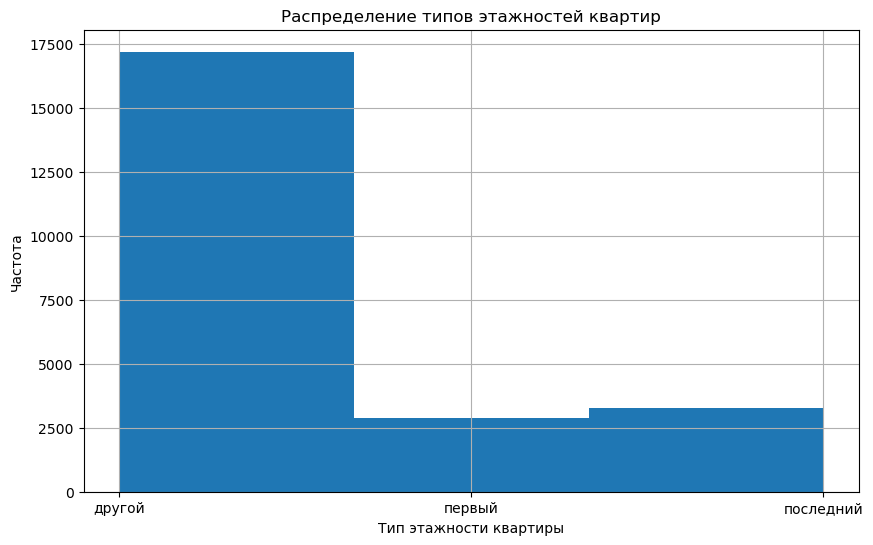

In [150]:
data['floor_category'].hist(figsize=(10, 6), bins=3)
plt.xlabel('Тип этажности квартиры')
plt.ylabel('Частота')
plt.title('Распределение типов этажностей квартир')
plt.show()

Количество продаваемых квартир на последнем этаже немного больше, чем на первом. Большинство квартир находится на промежуточных этажах.

In [151]:
data['floors_total'].describe()

count    23298.000000
mean        10.710748
std          6.610438
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

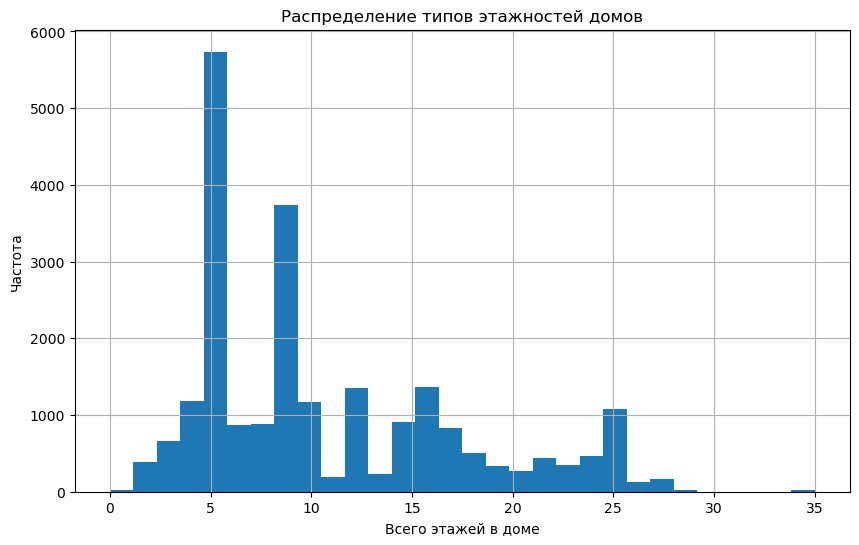

In [152]:
data['floors_total'].hist(figsize=(10, 6), bins=30, range=(0, 35))
plt.xlabel('Всего этажей в доме')
plt.ylabel('Частота')
plt.title('Распределение типов этажностей домов')
plt.show()

Дома в основном представлены пятиэтажными, а также девятиэтажными зданиями. Наблюдаются пики для 12-ти, 16-ти и 25-ти этажных зданий.

In [153]:
data['cityCenters_nearest'].describe()

count    17873.000000
mean        14.335758
std          8.597732
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

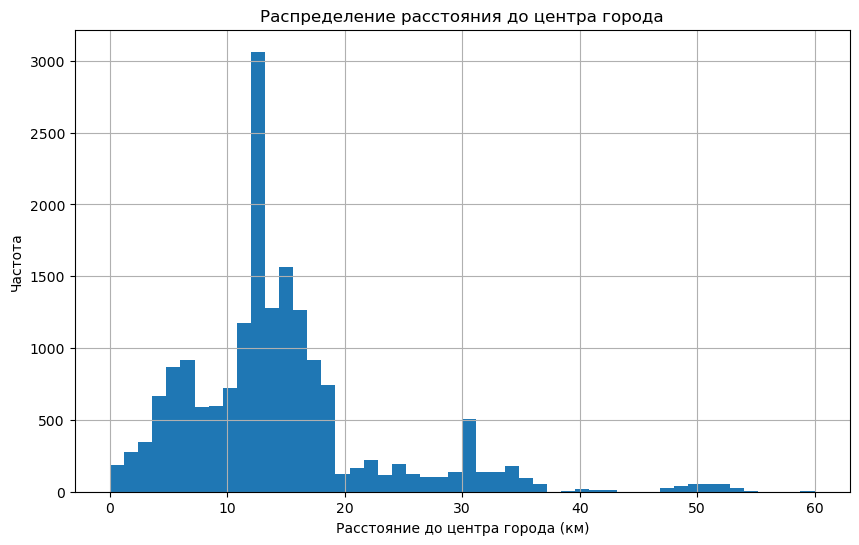

In [154]:
data['cityCenters_nearest'].hist(figsize=(10, 6), bins=50, range=(0, 60))
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Частота')
plt.title('Распределение расстояния до центра города')
plt.show()

Основная часть объектов находится в непосредственной примерно на расстоянии 13 км. Много объектов расположено в диапазоне 14-18 км от центра города.

In [155]:
data['airports_nearest'].describe()

count    17853.000000
mean     28827.981852
std      12717.733248
min          0.000000
25%      18490.000000
50%      26770.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

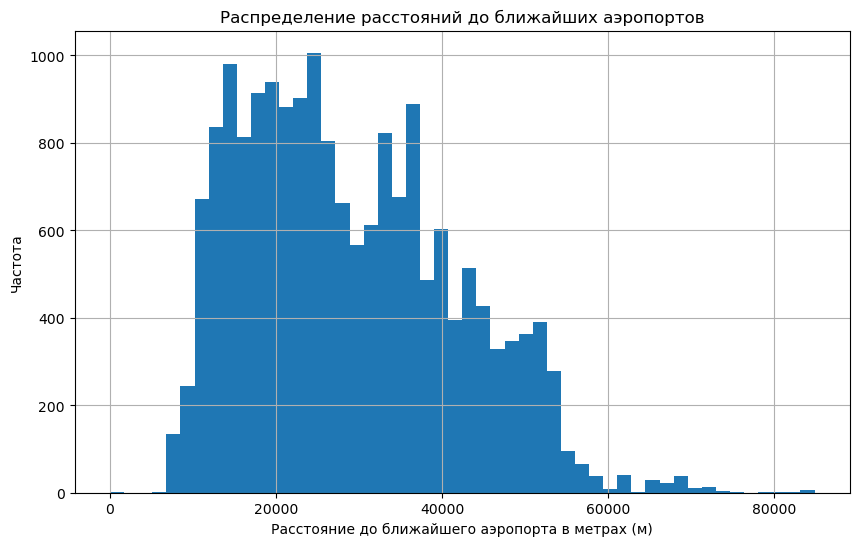

In [156]:
max_distance = data['airports_nearest'].max()
data['airports_nearest'].hist(figsize=(10, 6), bins=50, range=(0, max_distance))
plt.xlabel('Расстояние до ближайшего аэропорта в метрах (м)')
plt.ylabel('Частота')
plt.title('Распределение расстояний до ближайших аэропортов')
plt.show()

Основная часть квартир находится на расстоянии в диапазоне от 17 до 35 км от аэропорта.

In [157]:
data['parks_nearest'].describe()

count    7849.000000
mean      493.660849
std       342.322567
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

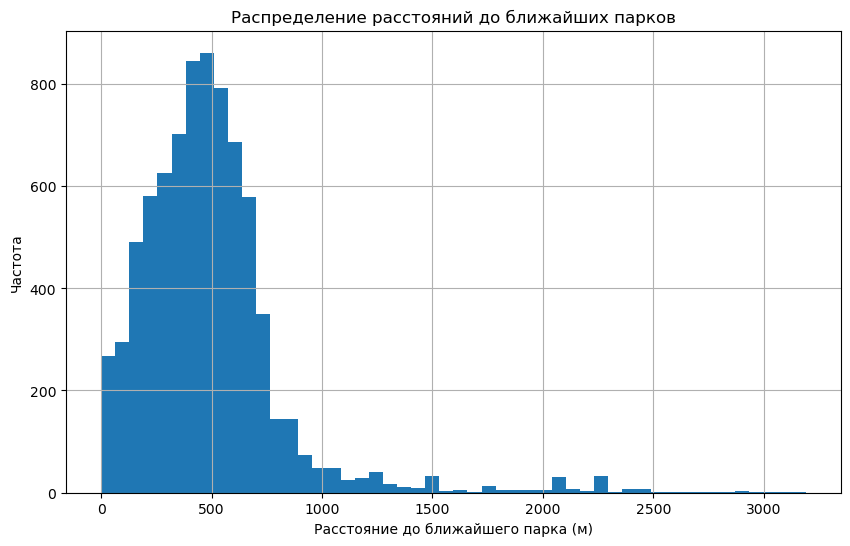

In [158]:
max_distance_parks = data['parks_nearest'].max()
data['parks_nearest'].hist(figsize=(10, 6), bins=50, range=(0, max_distance_parks))
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Частота')
plt.title('Распределение расстояний до ближайших парков')
plt.show()

Большинство продаваемых квартир находится недалеко от парков, в основном на расстоянии около 400-600 метров.

In [159]:
data['day_of_week'].describe()

count    23383.000000
mean         2.567250
std          1.788539
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

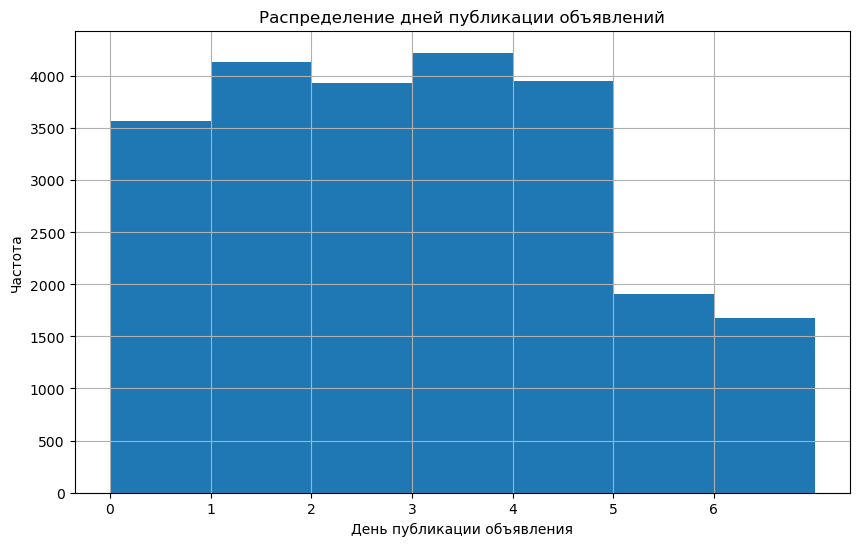

In [160]:
data['day_of_week'].hist(figsize=(10, 6), bins=7, range=(0, 7))
plt.xticks(range(0, 7))
plt.xlabel('День публикации объявления')
plt.ylabel('Частота')
plt.title('Распределение дней публикации объявлений')
plt.show()

Объявления чаще всего публикуются в будние дни, особенно во вторник и четверг. В выходные дни публикация объявлений происходит почти в два раза реже.

In [161]:
data['month'].describe()

count    23383.000000
mean         6.399136
std          3.491169
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

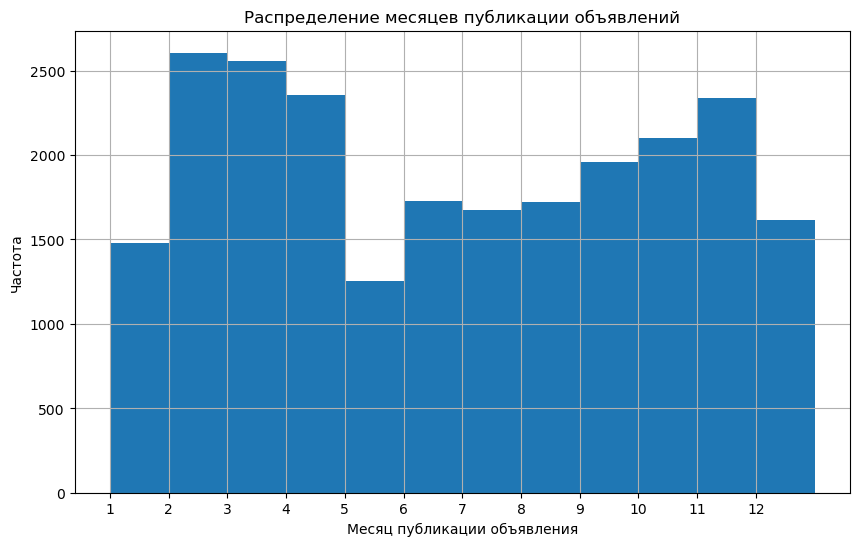

In [162]:
data['month'].hist(figsize=(10, 6), bins=12, range=(1, 13))
plt.xticks(range(1, 13))
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Частота')
plt.title('Распределение месяцев публикации объявлений')
plt.show()

Основной пик размещения объявлений приходится на февраль, март и апрель. В мае наблюдается резкий спад, после чего количество объявлений стабильно летом. Небольшой рост наблюдается в осенний период, со спадом в декабре.

**Изучены параметры объектов и сделаны следующие выводы:**


- **Площадь и жилое пространство:**
    - Большинство объектов имеют площадь 45-75 кв. м, объекты свыше 200 кв. м редки.
    - Основная часть объектов имеет жилую площадь около 15-18 квадратных метров, сj вторым пиком в диапазоне 30 кв. м.
    - Большая часть кухонь имеет площадь 8 и 6 кв. м, кухни более 15 кв. м редки.

- **Стоимость:**
    - Основная доля объектов находится в ценовом диапазоне от 3 до 4,8 млн рублей.
    - Квартиры стоимостью от 20 до 30 млн рублей представлены примерно в одинаковом количестве.

- **Количество комнат:**
    - Чаще всего продаются однокомнатные и двухкомнатные квартиры.
    - Квартиры с более чем семью комнатами крайне редки.

- **Высота потолков:**
    - В основном составляет от 2,60 до 2,70 метров, примерно 75% значений.

- **Этажность:**
    - Большинство объектов расположены на 5 этаже.
    - Меньшее количество квартир находится на 2-3 этажах.
    - Количество продаваемых квартир на последнем этаже немного больше, чем на первом.

- **Этажность зданий:**
    - Дома в основном пяти- и девятиэтажные.
    - Пики наблюдаются для 12-, 16- и 25-этажных зданий.


- **Расположение:**
    - Большая часть объектов находится на расстоянии 13 км от центра.
    - Много объектов расположено в диапазоне 14-18 км от центра города.
    - Основная часть квартир находится на расстоянии в диапазоне от 17 до 35 км от аэропорта.
    - Большинство продаваемых квартир находятся недалеко от парков (около 400 - 600 метров).

- **Публикация объявлений:**
    - Чаще всего объявления публикуются в будние дни, особенно во вторник и четверг.
    - В выходные дни публикация объявлений происходит почти в два раза реже.
    - Основной пик размещения объявлений приходится на февраль, март и апрель, с резким спадом в мае и стабилизацией летом. Небольшой рост наблюдается осенью, со спадом в декабре.

**Изучим, как быстро продавались квартиры**

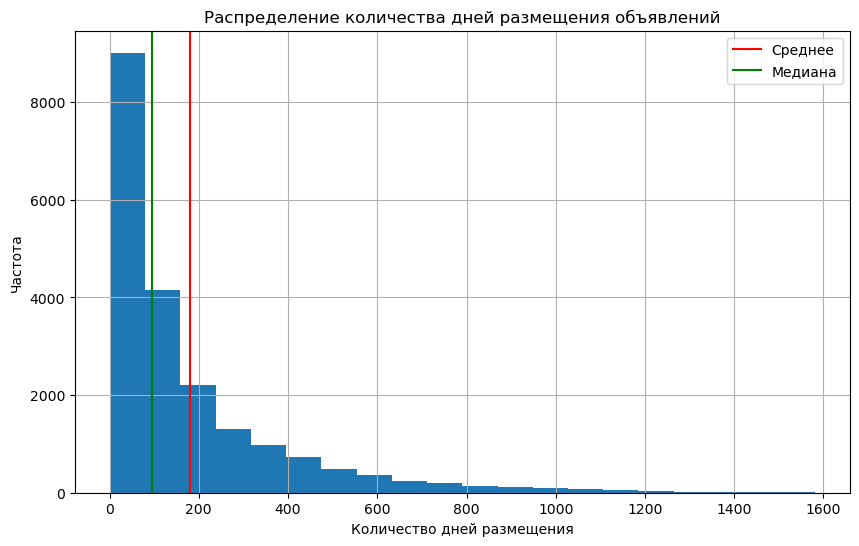

Среднее количество дней размещения объявлений: 180
Медианное количество дней размещения объявлений: 95


In [163]:
days_exposition_mean = data['days_exposition'].mean()
days_exposition_median = data['days_exposition'].median()

data['days_exposition'].hist(figsize=(10, 6), bins=20)
plt.axvline(days_exposition_mean, color='r', linestyle='-', label='Среднее')
plt.axvline(days_exposition_median, color='g', linestyle='-', label='Медиана')
plt.xlabel('Количество дней размещения')
plt.ylabel('Частота')
plt.title('Распределение количества дней размещения объявлений')
plt.legend()
plt.show()
print('Среднее количество дней размещения объявлений:', round(days_exposition_mean))
print('Медианное количество дней размещения объявлений:', round(days_exposition_median))

Большая часть данных сосредоточена в левой части, что указывает на то, что большинство объявлений размещается на относительно короткий срок. Гистограмма имеет правосторонний хвост, указывая на наличие небольшого числа объявлений, которые остаются активными в течение длительного времени.

Обычное время продажи составляет около 95 дней, что подтверждается пиком на гистограмме около этого значения.

- **Быстрые продажи:** Продажи, которые происходят быстрее медианного значения (95 дней), можно считать быстрыми.

- **Необычно долгие продажи:** Продажи, которые превышают среднее значение (180 дней), имеют спад на гистограмме, и их можно считать необычно долгими.

**Определим какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [164]:
# Создадим отдельный датафрейм для анализа оставив там необходимые столбцы

data_matrix = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
                   'day_of_week', 'month', 'year']]

In [165]:
# Построим матрицу корреляции

data_matrix.corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_of_week,month,year
last_price,1.000000,0.789683,0.692099,0.605867,0.523344,-0.020737,0.003770,-0.039724
total_area,0.789683,1.000000,0.932443,0.562472,0.791687,-0.014361,0.004648,-0.080551
living_area,0.692099,0.932443,1.000000,0.346335,0.873488,-0.009169,-0.005831,-0.072251
kitchen_area,0.605867,0.562472,0.346335,1.000000,0.207285,-0.013094,0.005996,-0.051842
rooms,0.523344,0.791687,0.873488,0.207285,1.000000,-0.005126,-0.005696,-0.052067
day_of_week,-0.020737,-0.014361,-0.009169,-0.013094,-0.005126,1.000000,0.011979,-0.004395
month,0.003770,0.004648,-0.005831,0.005996,-0.005696,0.011979,1.000000,-0.269645
year,-0.039724,-0.080551,-0.072251,-0.051842,-0.052067,-0.004395,-0.269645,1.000000


Коэффициент корреляции `total_area` с общей стоимостью: **0.79**
Общая площадь оказывает сильное влияние на стоимость квартиры, что логично, так как с увеличением площади стоимость также возрастает.


Коэффициент корреляции `living_area` с общей стоимостью: **0.69**
Жилая площадь также имеет значительное влияние на стоимость, однако меньшее по сравнению с общей площадью. И сильно коррелирует с общей площадью, что ожидаемо.


Коэффициент корреляции `kitchen_area` с общей стоимостью: **0.61**
Площадь кухни оказывает умеренное влияние на стоимость объекта.

Коэффициент корреляции `rooms` с общей стоимостью: **0.52**
Количество комнат оказывает умеренное влияние на стоимость объекта. И этот параметр хорошо коррелирует с общей площадью.

День недели, месяц и год (`day_of_week`, `month`, `year`)  не имеют значительного влияния на стоимость.

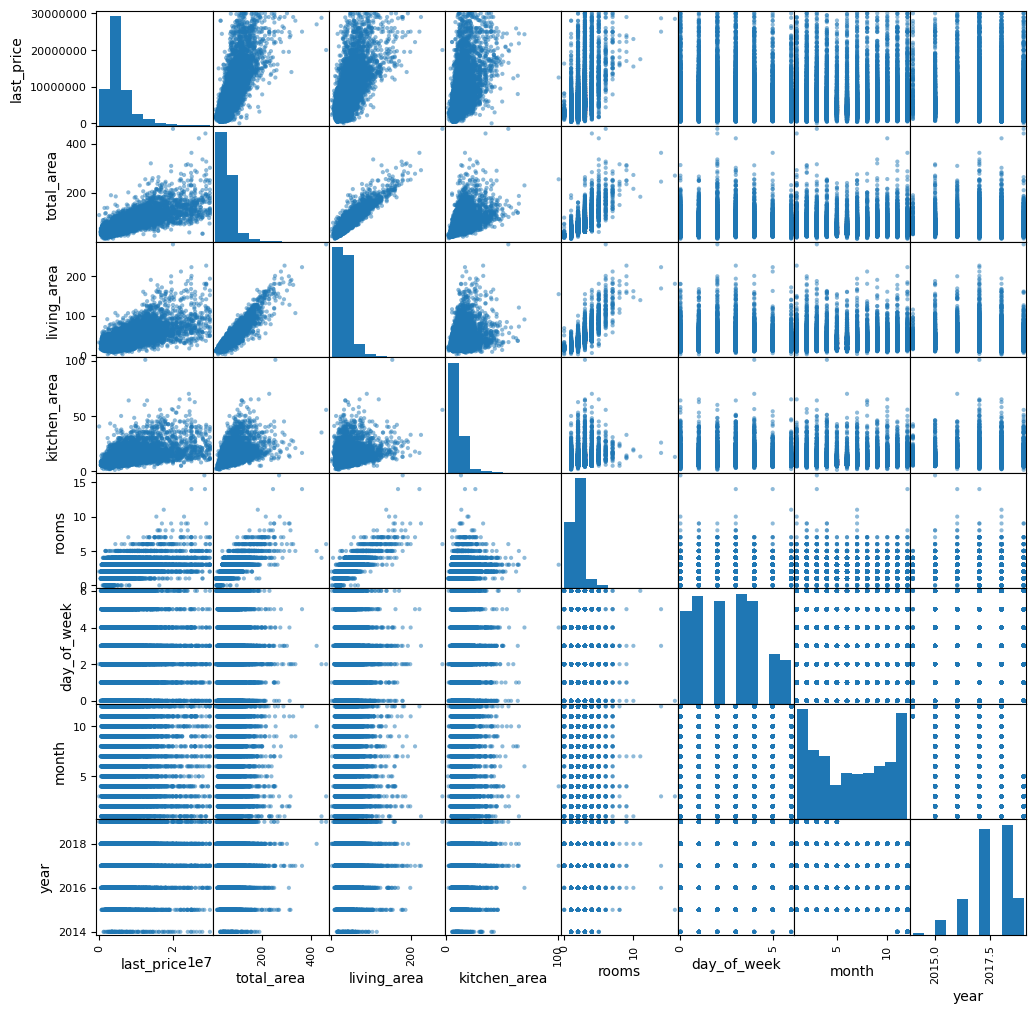

In [166]:
# Визуализируем матрицу корреляции

pd.plotting.scatter_matrix(data_matrix, figsize=(12, 12));

Наибольшее влияние на стоимость объекта оказывает его общая площадь. Чем больше площадь квартиры, тем выше её стоимость. Жилая площадь и площадь кухни также оказывают влияние на стоимость, но меньшее по сравнению с общей площадью. Количество комнат имеет умеренное влияние на стоимость, что связано с общей площадью. День недели, месяц и год размещения объявления практически не влияют на стоимость объекта.

**Определим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [167]:
# Сгруппируем по городу для вычисления среднего значения и подсчета количества объявлений 

data_cities = data.groupby('locality_name')['price'].agg(['mean', 'count']).reset_index()

In [168]:
# Переименование столбцов

data_cities.columns = ['locality_name', 'avg_price', 'count']

In [169]:
# Отсортируем топ-10 городов по количеству объявлений

top_10_cities = data_cities.sort_values('count', ascending=False).head(10)

In [170]:
# Отсортируем по средней цене

top_10_cities.sort_values('avg_price', ascending=False)

,locality_name,avg_price,count
33,Санкт-Петербург,110548.208189,15408
32,Пушкин,103130.851744,367
93,деревня Кудрово,92473.547576,299
296,посёлок Парголово,90175.913458,327
291,посёлок Мурино,85752.189195,522
326,посёлок Шушары,78677.364217,440
13,Колпино,75333.295801,337
6,Гатчина,68746.146763,307
3,Всеволожск,68654.473986,398
4,Выборг,58141.909153,237


Наибольшее количество объявлений размещено в Санкт-Петербурге, что неудивительно, так как это самый крупный населённый пункт и отдельный субъект федерации. Соответственно, средняя цена за квадратный метр здесь самая высокая.

Из областных городов на втором месте по стоимости квадратного метра находится Пушкин, уступая только Санкт-Петербургу. Выборг замыкает десятку городов по средней цене квадратного метра с наибольшим количеством объявлений.

**Вычислим среднюю цену каждого километра в Санкт-Петербурге**

In [171]:
# Отфильтруем данные только по Санкт-Петербургу

data_spb = data[data['locality_name'] == 'Санкт-Петербург']

In [172]:
# Вычислим среднюю цену каждого километра

avg_price_km = data_spb.groupby('cityCenters_nearest')['last_price'].mean().reset_index()

In [173]:
# Переименование столбцов

avg_price_km.columns = ['kilometers', 'avg_price']

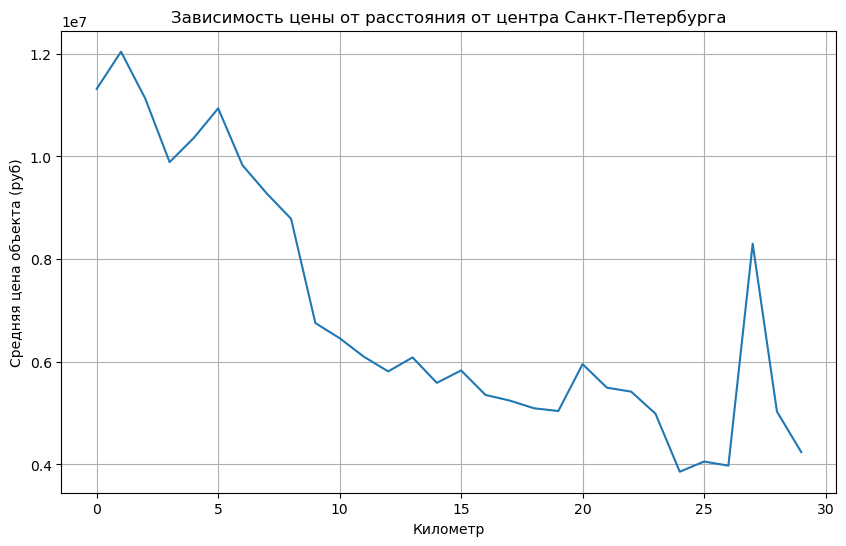

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(avg_price_km['kilometers'], avg_price_km['avg_price'])
plt.xlabel('Километр')
plt.ylabel('Средняя цена объекта (руб)')
plt.title('Зависимость цены от расстояния от центра Санкт-Петербурга')
plt.grid(True)
plt.show()

Общая линия тренда на графике показывает, что чем дальше от центра, тем цена квартир ниже. Однако для квартир, расположенных на расстоянии более 10 км от центра, цена остается примерно на одном уровне. Резкие колебания на графике могут быть связаны с выбросами, либо с тем, что в некоторых районах цена значительно выше или ниже средней для данного расстояния.

### Общий вывод

В нашем распоряжении находятся данные сервиса Яндекс.Недвижимость, включающие архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель исследования — определить рыночную стоимость объектов недвижимости и установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

Была выполнена предобработка данных  Мы выявили и обработали пропуски, устранили неявные дубликаты, также редкие и выбивающиеся значения. Тип данных столбца first_day_exposition был переведён в datetime для упрощения работы с датами. Добавлены новые столбцы: цена одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

**Параметры объектов недвижимости**


**Площадь и жилое пространство:**
- Большинство объектов имеют площадь 45-75 кв.м.
- Жилая площадь большинства объектов около 15-18 кв.м.
- Площадь кухни чаще всего 6-8 кв.м.


**Стоимость:**
- Основная доля объектов в ценовом диапазоне 3-4,8 млн рублей.
- Квартиры стоимостью 20-30 млн рублей встречаются реже.

**Количество комнат:**
- Чаще всего продаются однокомнатные и двухкомнатные квартиры.

**Высота потолков:**
- В основном 2,60-2,70 метров.

**Этажность:**
- Большинство объектов расположены на 5 этаже.
- Квартир на последних этажах больше, чем на первых.

**Расположение:**
- Основная часть объектов находится на расстоянии около 13 км от центра города.

**Публикация объявлений:** 
- Публикации чаще всего происходят в будние дни, особенно во вторник и четверг.
- Пик публикаций в феврале, марте и апреле.

**Скорость продаж:**
- Обычное время продажи — около 95 дней.
- Быстрые продажи происходят быстрее 95 дней.
- Необычно долгие продажи превышают 180 дней.

**Факторы, влияющие на стоимость:** 
- Общая площадь: корреляция *0.79*
- Жилая площадь: корреляция *0.69*

**Цена квадратного метра:**
- Наибольшее количество объявлений и самая высокая цена за квадратный метр в Санкт-Петербурге.
- Чем дальше от центра, тем ниже цена, но для квартир более 10 км от центра цена стабильна.

#### Основной вывод

Исследование показало, что цена квартиры сильно зависит от её общей и жилой площади, количества комнат, этажности, а также дня недели и времени года публикации объявления. Наибольшее количество объявлений размещается в Санкт-Петербурге, где средняя цена за квадратный метр самая высокая. Обнаружены значительные сезонные колебания цен, а также различия в цене в зависимости от расстояния до центра города.